In [2]:
import cv2
import matplotlib.pyplot as plt

import Utils.showImages as showImg
import Utils.histogram as hist
from skimage.metrics import structural_similarity as ssim


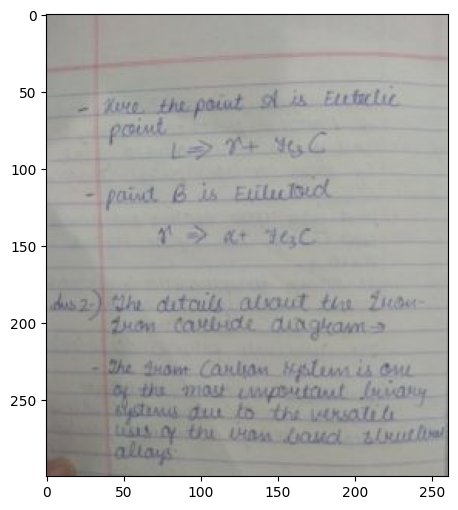

In [10]:
IMAGE_PATH = 'images\\im.jpg'
ORIGINAL_IMAGE = cv2.imread(IMAGE_PATH)
ORIGINAL_IMAGE = cv2.cvtColor(ORIGINAL_IMAGE, cv2.COLOR_BGR2RGB)

showImg.show_img_plt(ORIGINAL_IMAGE)


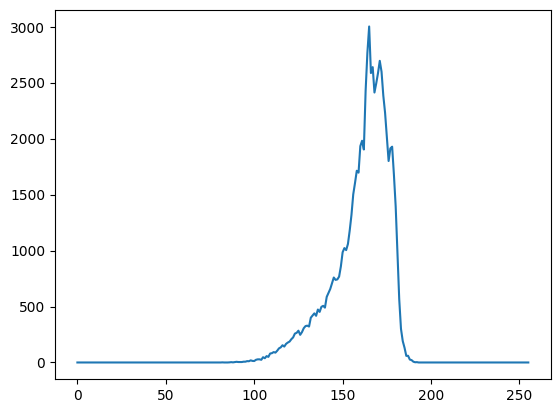

In [11]:
histr = cv2.calcHist([ORIGINAL_IMAGE],[0],None,[256],[0,256])
  
# show the plotting graph of an image
plt.plot(histr)
plt.show()

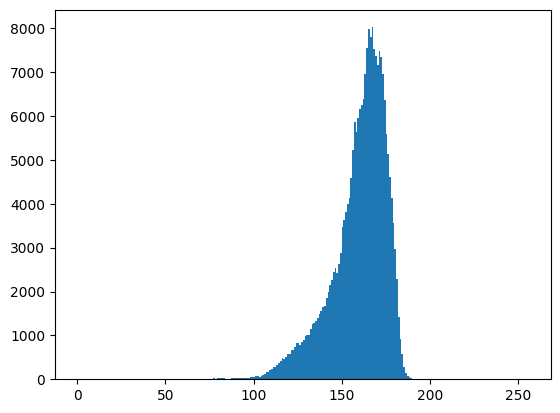

In [12]:
plt.hist(ORIGINAL_IMAGE.ravel(),256,[0,256])
plt.show()

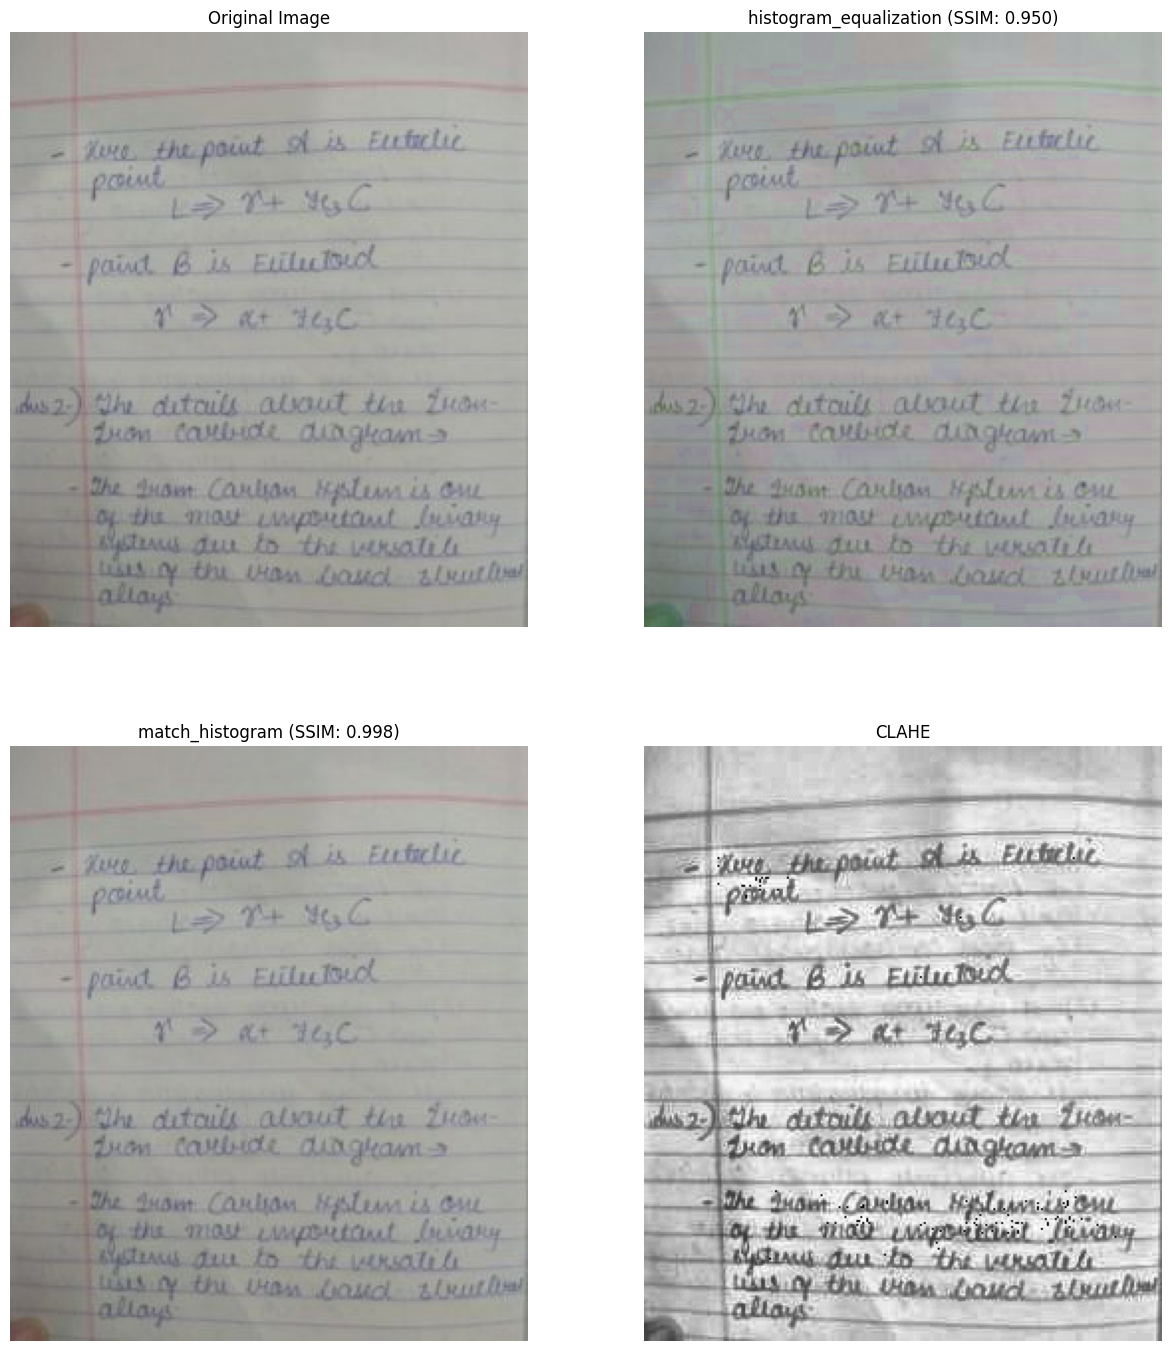

In [13]:
ch1 = hist.apply_histogram_equalization(ORIGINAL_IMAGE)
mssim_ch1, grad = ssim(ORIGINAL_IMAGE, ch1, full=True, win_size = 7, channel_axis=2)

ch2 = hist.match_histogram(ORIGINAL_IMAGE, ch1)
mssim_ch2, grad = ssim(ORIGINAL_IMAGE, ch2, full=True, win_size = 7, channel_axis=2)

CLAHE = hist.applyCLAHE(ORIGINAL_IMAGE)


showImg.show_mult_img(2, 2,\
    [ORIGINAL_IMAGE, ch1, ch2,CLAHE],\
    ['Original Image',\
        f'histogram_equalization (SSIM: {mssim_ch1:.3f})',\
        f'match_histogram (SSIM: {mssim_ch2:.3f})',\
        f'CLAHE'])

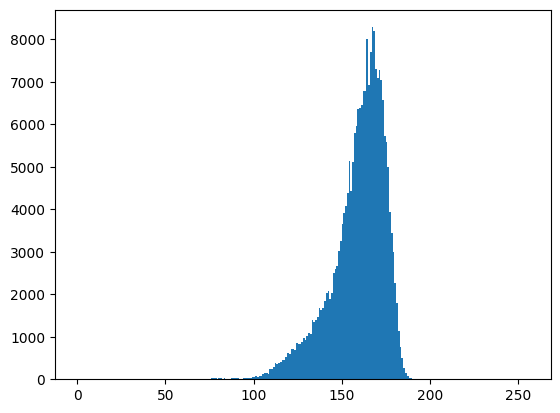

In [14]:
plt.hist(ch1.ravel(),256,[0,256])
plt.show()